In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import itertools

In [2]:
def get_FE_profile(filename, ref_vol, fillna_bool=False):
    df = pd.read_csv(filename, sep='\s+')
    if fillna_bool:
        df = df.fillna(40000)
    else:
        df = df.dropna()
    #df = df.fillna(0)
    df = df.reset_index()
    df['avg_press'] *= 101325
    closest_to_zero = (df['volume'] - ref_vol).apply(abs)
    rel_id = closest_to_zero.argmin()
    df['volume'] *= (1e-10)**3

    free_eng_list = [0]
    for i in range(1,len(df['avg_press'])):
        free_eng_list.append(-integrate.trapz(df['avg_press'].array[:i], x=df['volume'].array[:i]))
        
    free_eng = np.array(free_eng_list)
    free_eng *= 6.022e23 / 1000
    #free_eng -= min(free_eng)
    free_eng -= free_eng[rel_id]

    return df.copy(), free_eng

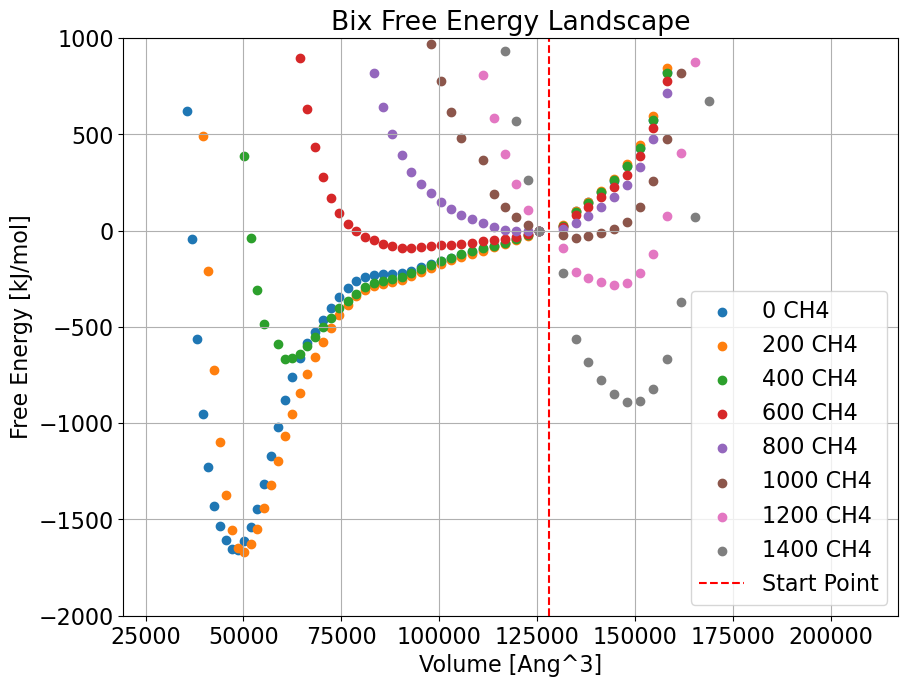

--------------------------------------------
df_0
31.282660764889897 3767.8985987828555
32.08266679374612 3767.8985987828555
32.482670050748204 1436.5156528429034
32.882673039216684 623.4631485209666
33.28267577557653 -45.082754442187706
33.682678568965265 -564.3090879086831
34.08268141312921 -950.0406192791752
34.48268402196504 -1228.5272179552894
34.882686683269334 -1427.6492423343507
35.282689123715436 -1535.8916194870153
35.682691617864755 -1604.2893113754271
36.08269416036558 -1653.3876910977524
36.4826964958149 -1656.999738476864
36.88269888085649 -1610.99999388389
37.28270107089388 -1538.1230986468045
37.68270331141261 -1443.490584183718
38.08270559779834 -1318.1842269906392
38.482707700667476 -1168.3411547655305
38.88270985031562 -1019.0945848352276
39.28271182658013 -879.1230801949223
39.68271385026202 -758.9123210904072
40.08271591735541 -661.0361485605745
40.48271782071932 -584.8205034180573
40.882719768165174 -524.5076194894209
41.28272156048251 -462.4759033330838
41.682723

In [3]:
#df_0, free_eng_0 = get_FE_profile('bix_FreeEnergy_0.txt', 95000)
data_dir = 'FreeEnergy_May_data'
df_0, free_eng_0 = get_FE_profile(data_dir + '/pressures_bix_0mol.txt', 128024)
df_200, free_eng_200 = get_FE_profile(data_dir + '/pressures_bix_200mol.txt', 128024)
df_400, free_eng_400 = get_FE_profile(data_dir + '/pressures_bix_400mol.txt', 128024)
df_600, free_eng_600 = get_FE_profile(data_dir + '/pressures_bix_600mol.txt', 128024)
df_800, free_eng_800 = get_FE_profile(data_dir + '/pressures_bix_800mol.txt', 128024)
df_1000, free_eng_1000 = get_FE_profile(data_dir + '/pressures_bix_1000mol.txt', 128024)
df_1200, free_eng_1200 = get_FE_profile(data_dir + '/pressures_bix_1200mol.txt', 128024)
df_1400, free_eng_1400 = get_FE_profile(data_dir + '/pressures_bix_1400mol.txt', 128024)


""""""

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,7.5))
plt.scatter(df_0['volume']*1e30, free_eng_0, label='0 CH4')
plt.scatter(df_200['volume']*1e30, free_eng_200, label='200 CH4')
plt.scatter(df_400['volume']*1e30, free_eng_400, label='400 CH4')
plt.scatter(df_600['volume']*1e30, free_eng_600, label='600 CH4')
plt.scatter(df_800['volume']*1e30, free_eng_800, label='800 CH4')
plt.scatter(df_1000['volume']*1e30, free_eng_1000, label='1000 CH4')
plt.scatter(df_1200['volume']*1e30, free_eng_1200, label='1200 CH4')
plt.scatter(df_1400['volume']*1e30, free_eng_1400, label='1400 CH4')
plt.plot([128000, 128000], [-2000,1000], 'r--', label='Start Point')
plt.xlabel('Volume [Ang^3]')
plt.ylabel('Free Energy [kJ/mol]')
plt.grid(); plt.ylim((-2000,1000))
plt.legend()
plt.title('Bix Free Energy Landscape')
plt.savefig('Bix_FE_Landscape.png', dpi=400)
plt.show()

print("--------------------------------------------")
print("df_0")
for i in range(len(df_0['volume'])):
    print((df_0['volume'].iloc[i]*1e30)**(1/3), free_eng_0[i])

print("--------------------------------------------")
print("df_400")
for i in range(len(df_400['volume'])):
    print((df_400['volume'].iloc[i]*1e30)**(1/3), free_eng_400[i])

print("--------------------------------------------")
print("df_600")
for i in range(len(df_600['volume'])):
    print((df_600['volume'].iloc[i]*1e30)**(1/3), free_eng_600[i])

print("--------------------------------------------")
print("df_800")
for i in range(len(df_800['volume'])):
    print((df_800['volume'].iloc[i]*1e30)**(1/3), free_eng_800[i])

print("--------------------------------------------")
print("df_1400")
for i in range(len(df_1400['volume'])):
    print((df_1400['volume'].iloc[i]*1e30)**(1/3), free_eng_1400[i])

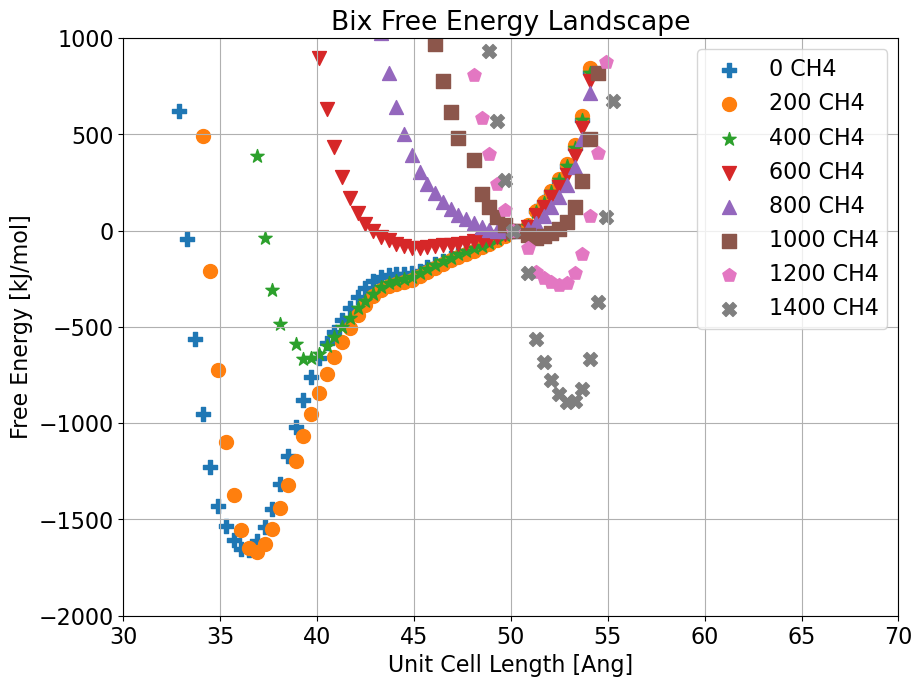

--------------------------------------------
df_0
31.282660764889897 3767.8985987828555
32.08266679374612 3767.8985987828555
32.482670050748204 1436.5156528429034
32.882673039216684 623.4631485209666
33.28267577557653 -45.082754442187706
33.682678568965265 -564.3090879086831
34.08268141312921 -950.0406192791752
34.48268402196504 -1228.5272179552894
34.882686683269334 -1427.6492423343507
35.282689123715436 -1535.8916194870153
35.682691617864755 -1604.2893113754271
36.08269416036558 -1653.3876910977524
36.4826964958149 -1656.999738476864
36.88269888085649 -1610.99999388389
37.28270107089388 -1538.1230986468045
37.68270331141261 -1443.490584183718
38.08270559779834 -1318.1842269906392
38.482707700667476 -1168.3411547655305
38.88270985031562 -1019.0945848352276
39.28271182658013 -879.1230801949223
39.68271385026202 -758.9123210904072
40.08271591735541 -661.0361485605745
40.48271782071932 -584.8205034180573
40.882719768165174 -524.5076194894209
41.28272156048251 -462.4759033330838
41.682723

In [5]:
marker = itertools.cycle(('P', 'o', '*', 'v', '^', 's', 'p', 'X', 'D'))
plt.rcParams['lines.markersize'] = 10

#df_0, free_eng_0 = get_FE_profile('bix_FreeEnergy_0.txt', 95000)
data_dir = 'FreeEnergy_May_data'
df_0, free_eng_0 = get_FE_profile(data_dir + '/pressures_bix_0mol.txt', 128024)
df_200, free_eng_200 = get_FE_profile(data_dir + '/pressures_bix_200mol.txt', 128024)
df_400, free_eng_400 = get_FE_profile(data_dir + '/pressures_bix_400mol.txt', 128024)
df_600, free_eng_600 = get_FE_profile(data_dir + '/pressures_bix_600mol.txt', 128024)
df_800, free_eng_800 = get_FE_profile(data_dir + '/pressures_bix_800mol.txt', 128024)
df_1000, free_eng_1000 = get_FE_profile(data_dir + '/pressures_bix_1000mol.txt', 128024)
df_1200, free_eng_1200 = get_FE_profile(data_dir + '/pressures_bix_1200mol.txt', 128024)
df_1400, free_eng_1400 = get_FE_profile(data_dir + '/pressures_bix_1400mol.txt', 128024)


""""""

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,7.5))
n = 1/3
plt.scatter((df_0['volume']*1e30)**n, free_eng_0, label='0 CH4', marker=next(marker))
plt.scatter((df_200['volume']*1e30)**n, free_eng_200, label='200 CH4', marker=next(marker))
plt.scatter((df_400['volume']*1e30)**n, free_eng_400, label='400 CH4', marker=next(marker))
plt.scatter((df_600['volume']*1e30)**n, free_eng_600, label='600 CH4', marker=next(marker))
plt.scatter((df_800['volume']*1e30)**n, free_eng_800, label='800 CH4', marker=next(marker))
plt.scatter((df_1000['volume']*1e30)**n, free_eng_1000, label='1000 CH4', marker=next(marker))
plt.scatter((df_1200['volume']*1e30)**n, free_eng_1200, label='1200 CH4', marker=next(marker))
plt.scatter((df_1400['volume']*1e30)**n, free_eng_1400, label='1400 CH4', marker=next(marker))
#plt.plot(np.array([128000, 128000])**n, [-2000,1000], 'r--', label='Start Point')
plt.xlabel('Unit Cell Length [Ang]')
plt.ylabel('Free Energy [kJ/mol]')
plt.grid(); plt.ylim((-2000,1000))
plt.xlim((30,70))
plt.legend()
plt.title('Bix Free Energy Landscape')
plt.savefig('Bix_FE_Landscape_t2.png', dpi=400)
plt.show()

print("--------------------------------------------")
print("df_0")
for i in range(len(df_0['volume'])):
    print((df_0['volume'].iloc[i]*1e30)**(1/3), free_eng_0[i])

print("--------------------------------------------")
print("df_400")
for i in range(len(df_400['volume'])):
    print((df_400['volume'].iloc[i]*1e30)**(1/3), free_eng_400[i])

print("--------------------------------------------")
print("df_600")
for i in range(len(df_600['volume'])):
    print((df_600['volume'].iloc[i]*1e30)**(1/3), free_eng_600[i])

print("--------------------------------------------")
print("df_800")
for i in range(len(df_800['volume'])):
    print((df_800['volume'].iloc[i]*1e30)**(1/3), free_eng_800[i])

print("--------------------------------------------")
print("df_1400")
for i in range(len(df_1400['volume'])):
    print((df_1400['volume'].iloc[i]*1e30)**(1/3), free_eng_1400[i])

72
72
8
(8, 72)


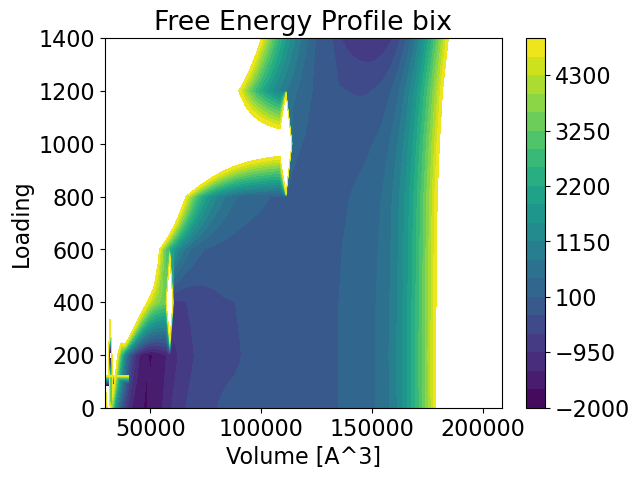

In [6]:
data_dir = 'FreeEnergy_May_data'
df_0, free_eng_0 = get_FE_profile(data_dir + '/pressures_bix_0mol.txt', 128024, fillna_bool=True)
df_200, free_eng_200 = get_FE_profile(data_dir + '/pressures_bix_200mol.txt', 128024, fillna_bool=True)
df_400, free_eng_400 = get_FE_profile(data_dir + '/pressures_bix_400mol.txt', 128024, fillna_bool=True)
df_600, free_eng_600 = get_FE_profile(data_dir + '/pressures_bix_600mol.txt', 128024, fillna_bool=True)
df_800, free_eng_800 = get_FE_profile(data_dir + '/pressures_bix_800mol.txt', 128024, fillna_bool=True)
df_1000, free_eng_1000 = get_FE_profile(data_dir + '/pressures_bix_1000mol.txt', 128024, fillna_bool=True)
df_1200, free_eng_1200 = get_FE_profile(data_dir + '/pressures_bix_1200mol.txt', 128024, fillna_bool=True)
df_1400, free_eng_1400 = get_FE_profile(data_dir + '/pressures_bix_1400mol.txt', 128024, fillna_bool=True)

#Contour Plot
loading_array = np.array([0, 200, 400, 600, 800, 1000, 1200, 1400])
vol_0 = (df_0['volume']).array*1e30
vol_200 = (df_200['volume']).array*1e30
vol_400 = (df_400['volume']).array*1e30
vol_600 = (df_600['volume']).array*1e30
vol_800 = (df_800['volume']).array*1e30
vol_1000 = (df_1000['volume']).array*1e30
vol_1200 = (df_1200['volume']).array*1e30
vol_1400 = (df_1400['volume']).array*1e30

full_vol_array = np.concatenate((vol_0, vol_200, vol_400, vol_600, vol_800, vol_1000, vol_1200, vol_1400))

#full_eng_array = np.concatenate((free_eng_0, free_eng_200, free_eng_400, free_eng_600, free_eng_800, free_eng_1000, free_eng_1200, free_eng_1400))
#print(full_eng_array.shape)
full_eng_array = np.array([free_eng_0, free_eng_200, free_eng_400, free_eng_600, free_eng_800, free_eng_1000, free_eng_1200, free_eng_1400])

print(len(vol_0))
print(len(vol_1000))
print(len(loading_array))
print(full_eng_array.shape)

plt.contourf(vol_0.tolist(), loading_array.tolist(), full_eng_array, vmin=-2000, vmax=5000, cmap='viridis', levels=np.linspace(-2000,5000,21))
cbar = plt.colorbar(extend='both')
plt.clim(vmin=-2000, vmax=5000)

plt.title('Free Energy Profile bix')
plt.xlabel('Volume [A^3]'); plt.ylabel('Loading')
plt.show()